In [164]:
# Import needed packages

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
# Load in the data

titanic = pd.read_csv('/Users/TT/Hyper Project/titanic.csv', index_col=[0])

In [166]:
titanic.head()

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


<big><b>1. Is there a significant relationship between gender and whether or not passenger survived?
    
Independent variable: Gender<p>
Dependent variable: Survival<p>
Confidence level: 0.95<p>
Significance level: 0.05


In [167]:
# Make crosstab to get counts of intersection

table = pd.crosstab(titanic.Sex, titanic.Survived)

table

Survived,0,1
Sex,,
female,154,308
male,709,142


In [215]:
# Run chi-square test
stat, p, dof, expected = chi2_contingency(table)

In [217]:
# Print results
print(stat) # test statistic
print(p) # p-value
print(dof) # degrees of freedom
print(expected) # expected values

329.8419924652638
1.0404030919650888e-73
1
[[303.66031988 158.33968012]
 [559.33968012 291.66031988]]


In [170]:
# p-value is less than 0.05 (alpha)
# There is a statistically significant relationship between gender and survival
# It is not due to chance that the relationship exists

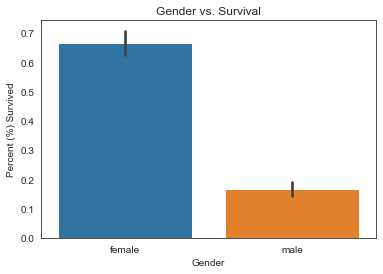

In [171]:
# Visualization of gender and survival

from matplotlib import rcParams

sns.set_style('white')
rcParams['figure.figsize'] = 6,4

sns.barplot(data=titanic, x='Sex', y='Survived')
plt.title('Gender vs. Survival')
plt.ylabel('Percent (%) Survived')
plt.xlabel('Gender')
plt.show()

<big><b>2. Is there a significant relationship between passenger class and whether or not passenger survived?
    
Independent variable: Passenger class<p>
Dependent variable: Survival<p>
Confidence level: 0.95<p>
Significance level: 0.05


In [220]:
# Clean the Passenger class column

titanic = titanic[titanic['PClass'] != '*']

titanic.PClass.unique()

array(['1st', '2nd', '3rd'], dtype=object)

In [173]:
table2 = pd.crosstab(titanic.PClass, titanic.Survived)

table2

Survived,0,1
PClass,,
1st,129,193
2nd,160,119
3rd,573,138


In [174]:
# Run chi-square test

stat2, p2, dof2, expected2 = chi2_contingency(table2)

In [218]:
# Print results
print(stat2) # test statistic
print(p2) # p-value
print(dof2) # degrees of freedom
print(expected2) # expected values

172.51911553147184
3.451040459491841e-38
2
[[211.55792683 110.44207317]
 [183.30640244  95.69359756]
 [467.13567073 243.86432927]]


In [176]:
# p-value is less than 0.05 (alpha)
# There is a statistically significant relationship between passenger class and survival
# It is not due to chance that the relationship exists

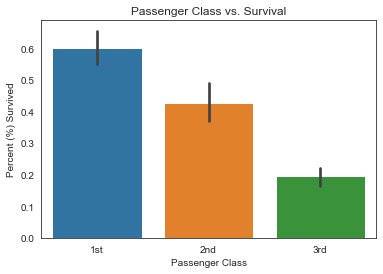

In [177]:
# Visualization of Passenger Class and Survival

sns.barplot(data=titanic, x='PClass', y='Survived')
plt.title('Passenger Class vs. Survival')
plt.ylabel('Percent (%) Survived')
plt.xlabel('Passenger Class')
plt.show()

<big><b>3. Is there a significant relationship between age and passenger class?
    
Independent variable: Age<p>
Dependent variable: Passenger class<p>
Confidence level: 0.95<p>
Significance level: 0.05


In [178]:
# Create bins for age with column 'Age Group'

bins = [0.0, 18, 25, 35, 45, 60, 75, 100]
category = ['0-17', '18-25', '26-35', '36-45', '46-60', '61-75', '75+']
titanic['Age Group'] = pd.cut(titanic['Age'], bins, labels=category)

titanic.head()

,Name,PClass,Age,Sex,Survived,SexCode,Age Group
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1,26-35
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1,0-17
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0,26-35
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1,18-25
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0,0-17


In [179]:
table3 = pd.crosstab(titanic['Age Group'], titanic.PClass)

table3

PClass,1st,2nd,3rd
Age Group,,,
0-17,17,36,73
18-25,30,53,102
26-35,39,73,85
36-45,50,29,49
46-60,72,19,7
61-75,18,2,2


In [180]:
stat3, p3, dof3, expected3 = chi2_contingency(table3)

In [219]:
# Print results
print(stat3) # test statistic
print(p3) # p-value
print(dof3) # degrees of freedom
print(expected3) # expected values

177.4765933234248
7.82484592087226e-33
10
[[37.66666667 35.33333333 53.        ]
 [55.3042328  51.87830688 77.81746032]
 [58.89153439 55.24338624 82.86507937]
 [38.26455026 35.89417989 53.84126984]
 [29.2962963  27.48148148 41.22222222]
 [ 6.57671958  6.16931217  9.25396825]]


In [182]:
# p-value is less than 0.05 (alpha)
# There is a statistically significant relationship between Age and Passenger class
# It is not due to chance that the relationship exists

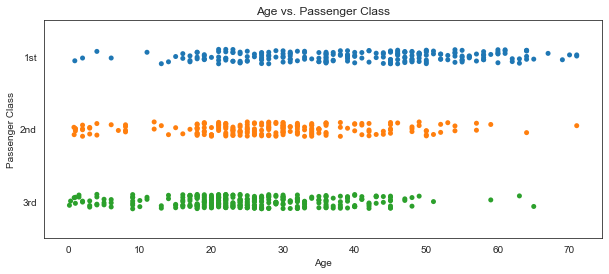

In [221]:
# Visualization of Age and Passenger Class

rcParams['figure.figsize'] = 10,4

sns.stripplot(data=titanic, x='Age', y='PClass')
plt.title('Age vs. Passenger Class')
plt.ylabel('Passenger Class')
plt.xlabel('Age')
plt.show()